# Lab 6 --- models!

Student: Rebecca Beutel

Date: February 18, 2022

In [2]:
# load packages
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import cartopy
from cartopy.feature import NaturalEarthFeature, GSHHSFeature
from matplotlib.colors import LogNorm

import cmocean.cm as cm
import copy
import xarray as xr

%matplotlib inline

Load files:

In [3]:
nitrate    = xr.open_dataset('SalishSeaCast_day_avg_nitrate_20160725_20160804.nc')
physics    = xr.open_dataset('SalishSeaCast_day_avg_physics_20160725_20160804.nc')
bathymetry = xr.open_dataset('ubcSSnBathymetryV17-02_bdc8_1811_3f13.nc')

In [4]:
# Stations
iqifs, jqifs = 761, 137
isent, jsent = 707, 145

#### Plot Bathymetry

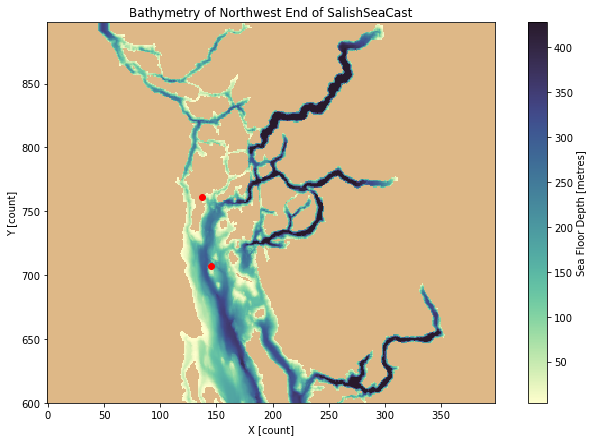

In [5]:
fig, ax = plt.subplots(1, 1, figsize=(12, 7))
mycm = copy.copy(cm.deep)
mycm.set_bad('burlywood')
bathymetry.bathymetry.plot(ax=ax, cmap=mycm);
ax.set_ylim(600, 898)
ax.plot(jsent, isent, 'ro')
ax.plot(jqifs, iqifs, 'ro')
ax.set_aspect(500/440)
ax.set_title('Bathymetry of Northwest End of SalishSeaCast');
fig.savefig('bathynorth.png')

# Part A: Fit for Purpose

Create a time series plot of each of salinity, temperature and nitrate at the two stations QIFs(which is at grid point y=761, and x=137)2 and Sentry Shoal (gridy=707, gridx=145). I suggest you use the top grid point (deptht=0)4 which is at 0.5 m. Note that Evans et al, 2019 do not provide nitrate but we could expect that pCO2 might behave similarly as carbon is also taken up by biology during photosynthesis

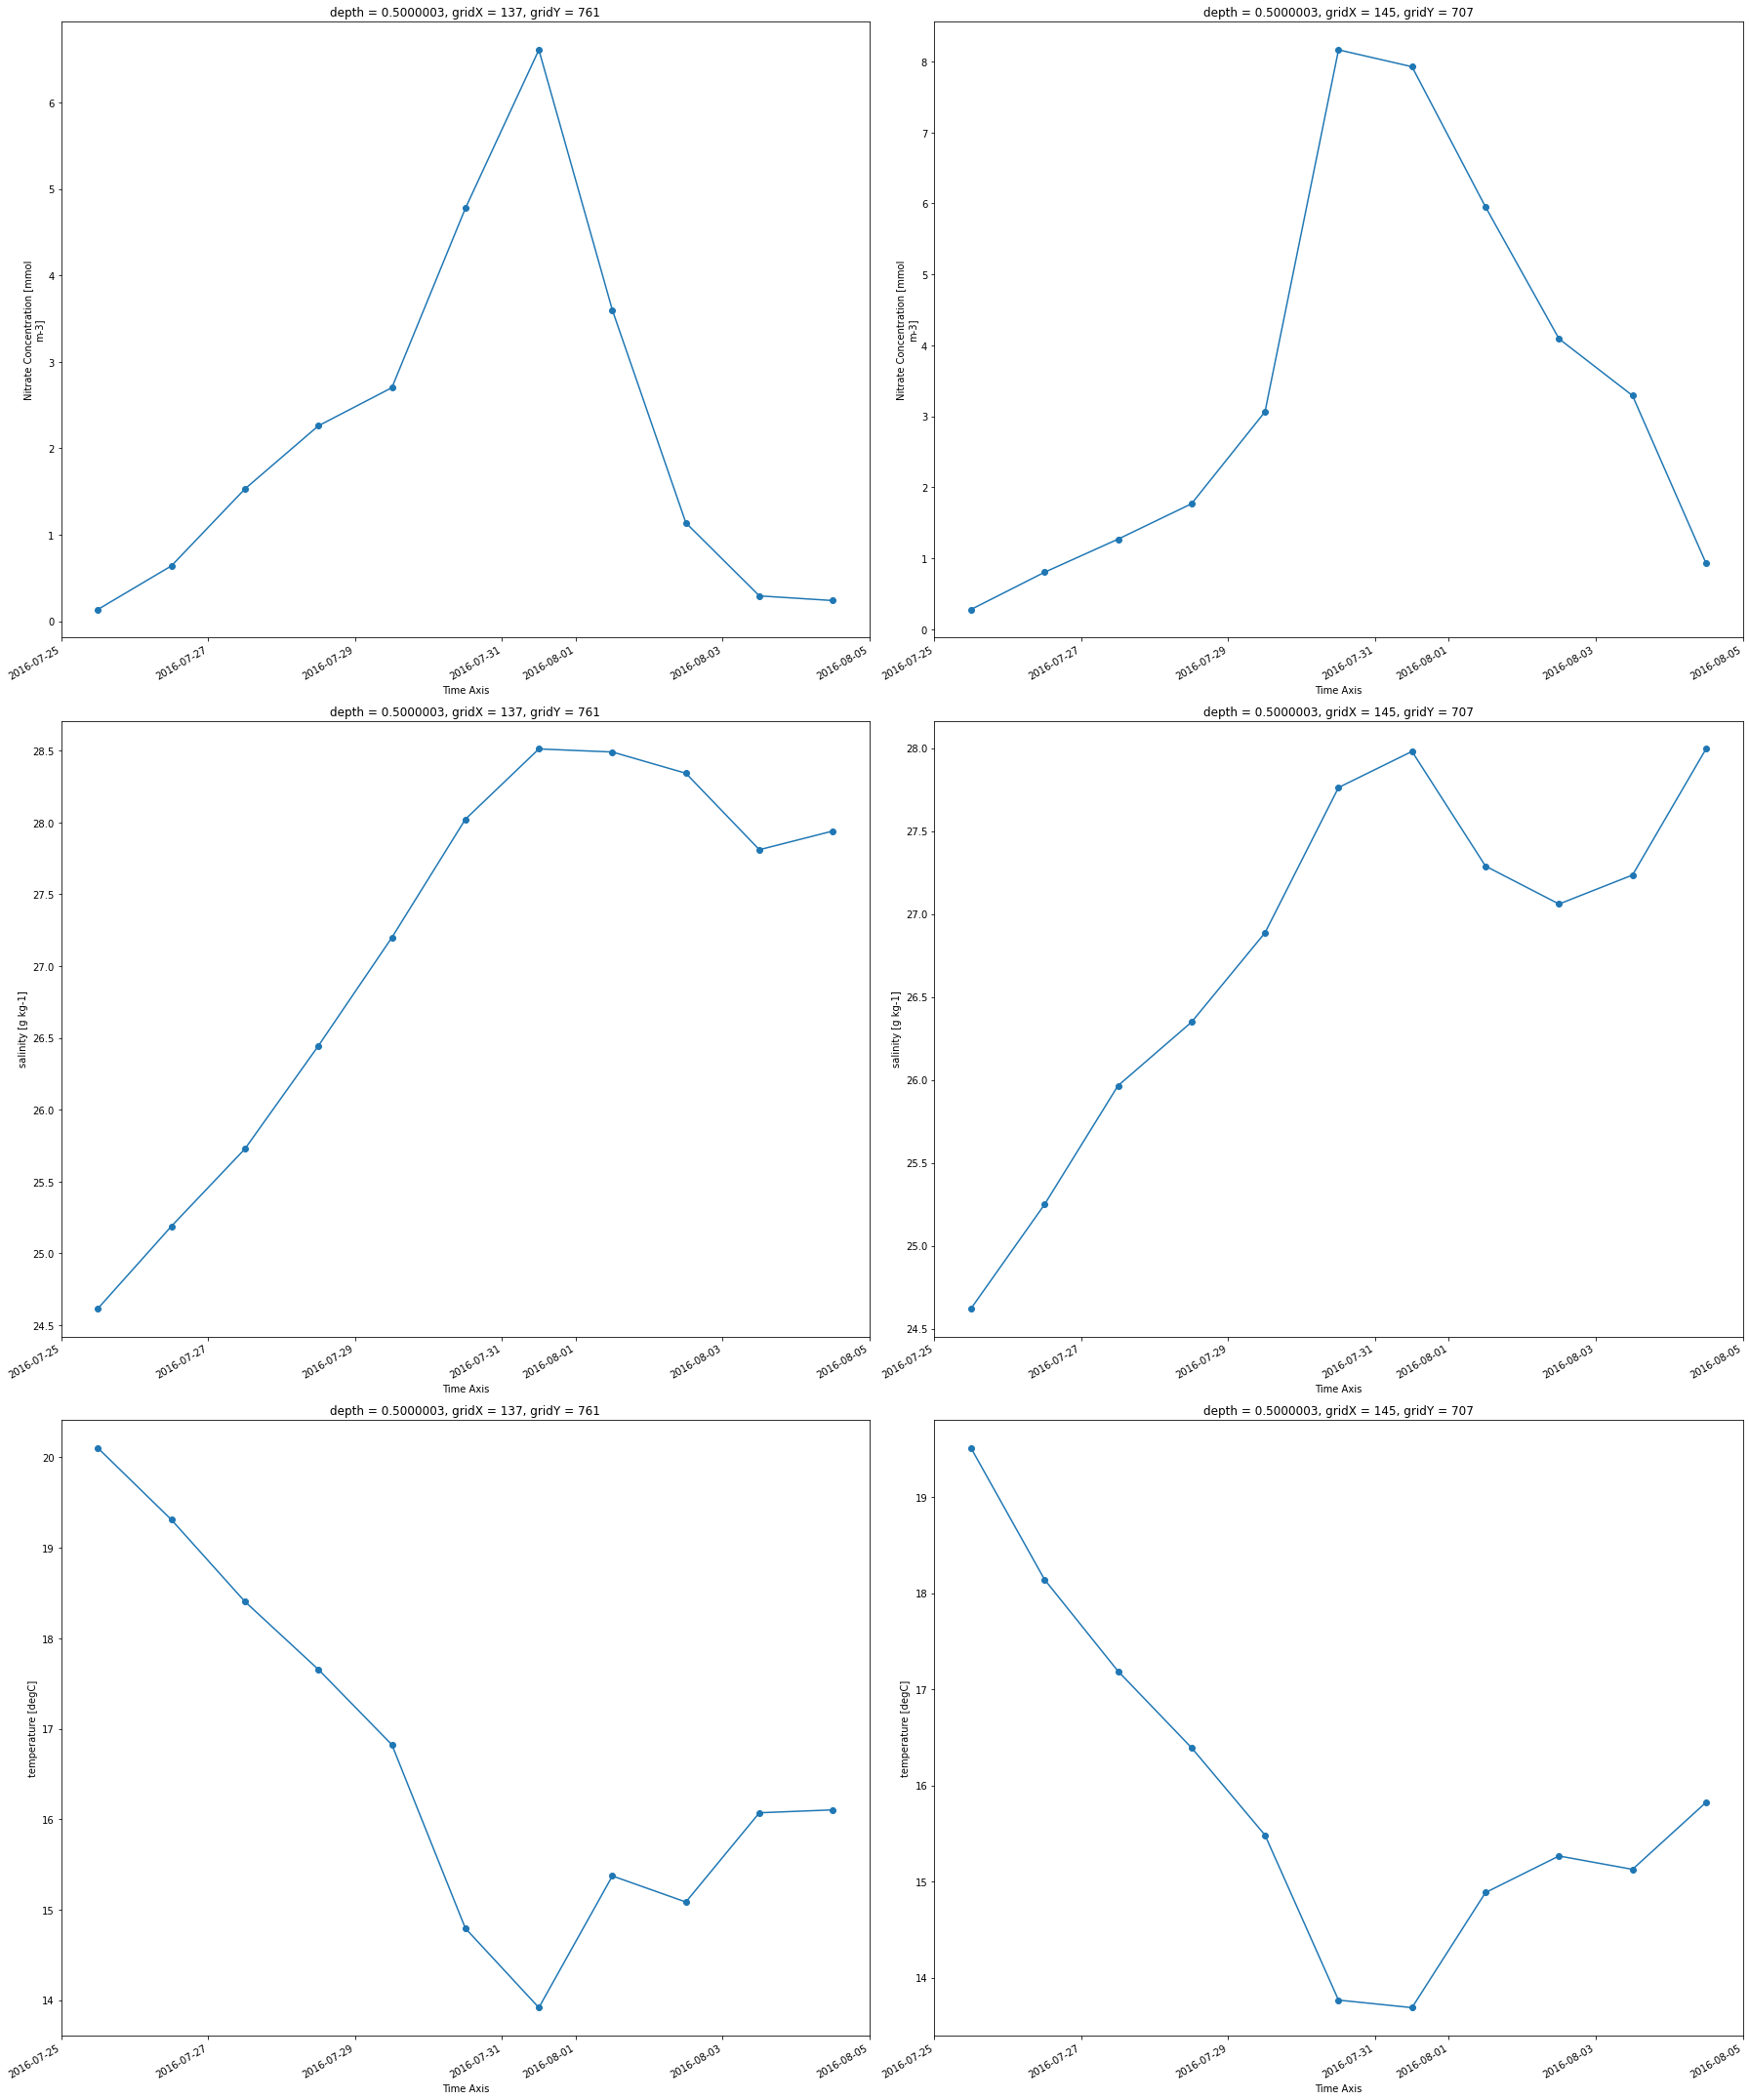

In [14]:
#first station QIF
fig, ax = plt.subplots(3, 2, figsize=(25, 30))
nitrate.nitrate[:, 0, iqifs, jqifs].plot(marker='o',ax=ax[0,0]);
physics.vosaline[:, 0, iqifs, jqifs].plot(marker='o',ax=ax[1,0]);
physics.votemper[:, 0, iqifs, jqifs].plot(marker='o',ax=ax[2,0]);

nitrate.nitrate[:, 0, isent, jsent].plot(marker='o',ax=ax[0,1]);
physics.vosaline[:, 0, isent, jsent].plot(marker='o',ax=ax[1,1]);
physics.votemper[:, 0, isent, jsent].plot(marker='o',ax=ax[2,1]);

plt.tight_layout()

### Does the model reproduce the observed signals, qualitatively?
compare qualitatively by looking at Evans Paper.

### How well does the model reproduce the signals, in timing and in amplitude? (Not thinking statistics here, just change in salinity observed versus modelled etc)
assuming still qualitiatve

### Is the model better at the more open station (Sentry Shoal) or the bay station (QIFs)?
assuming still qualitative

### Is the model fit for purpose: aka can we use it to investigate the observed phenomena? What are the caveats?
Likely get this from SSC prereadings

# Part B: Is it vertical mixing

Evans et al (2019) suggest wind-driven mixing as the source. The model provides vertical profiles, not just single depth observations. Investigate whether the model suggests the response is vertical mixing.

### What is conserved during vertical mixing?


### Plot profiles over time at the two stations of the three quantities.

Text(0.5, 1.0, 'QIF Nitrate')

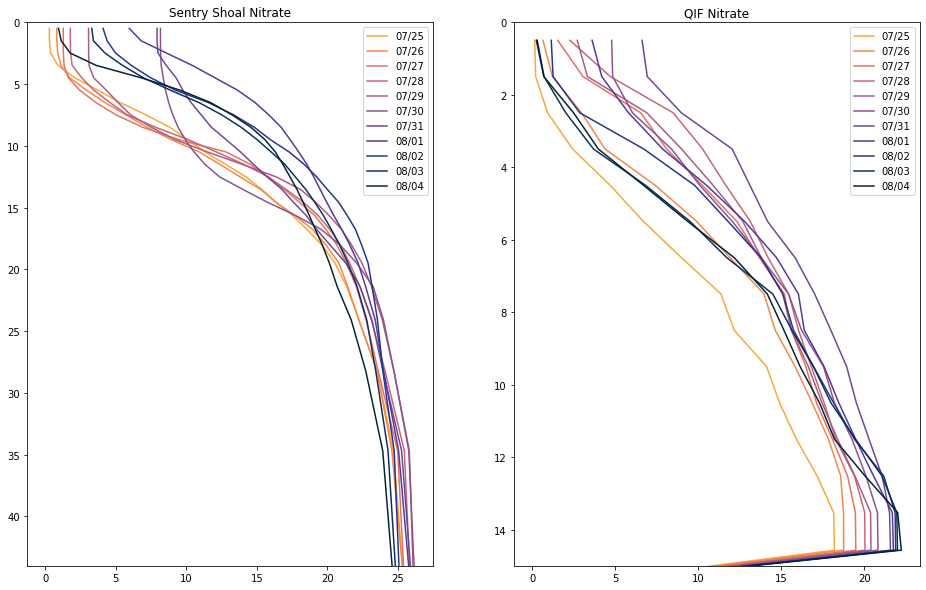

In [68]:
fig, ax = plt.subplots(1,2, figsize=(16,10))
colors = cm.thermal_r(np.linspace(0.2,1,11))

for i in range(len(nitrate.time)):
    time = pd.to_datetime(str(nitrate.time[i].values)).strftime("%m/%d")
    ax[0].plot(nitrate.nitrate[i,:,isent,jsent]+offset, nitrate.depth, label = time, c=colors[i])
ax[0].set_ylim([0,44])
ax[0].invert_yaxis()
ax[0].legend()
ax[0].set_title('Sentry Shoal Nitrate')


for i in range(len(nitrate.time)):
    time = pd.to_datetime(str(nitrate.time[i].values)).strftime("%m/%d")
    ax[1].plot(nitrate.nitrate[i,:,iqifs,jqifs]+offset, nitrate.depth, label = time, c=colors[i])
ax[1].set_ylim([0,15])
ax[1].invert_yaxis()
ax[1].legend()
ax[1].set_title('QIF Nitrate')

Text(0.5, 1.0, 'QIF Salinity')

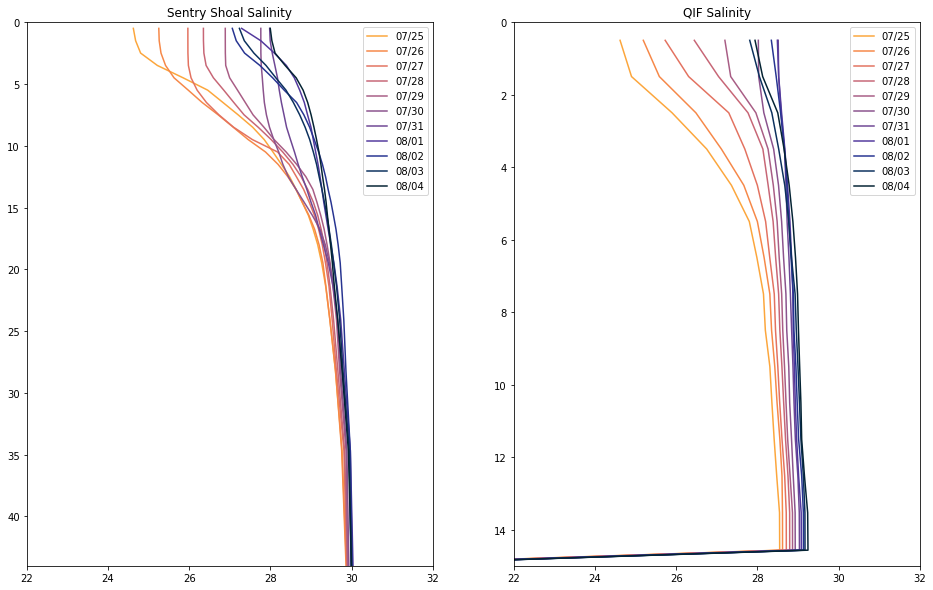

In [72]:
fig, ax = plt.subplots(1,2, figsize=(16,10))
colors = cm.thermal_r(np.linspace(0.2,1,11))

for i in range(len(physics.time)):
    time = pd.to_datetime(str(physics.time[i].values)).strftime("%m/%d")
    ax[0].plot(physics.vosaline[i,:,isent,jsent], physics.depth, label = time, c=colors[i])
ax[0].set_ylim([0,44])
ax[0].set_xlim([22,32])
ax[0].invert_yaxis()
ax[0].legend()
ax[0].set_title('Sentry Shoal Salinity')


for i in range(len(physics.time)):
    time = pd.to_datetime(str(nitrate.time[i].values)).strftime("%m/%d")
    ax[1].plot(physics.vosaline[i,:,iqifs,jqifs], physics.depth, label = time, c=colors[i])
ax[1].set_ylim([0,15])
ax[1].set_xlim([22,32])
ax[1].invert_yaxis()
ax[1].legend()
ax[1].set_title('QIF Salinity')

Text(0.5, 1.0, 'QIF Temperature')

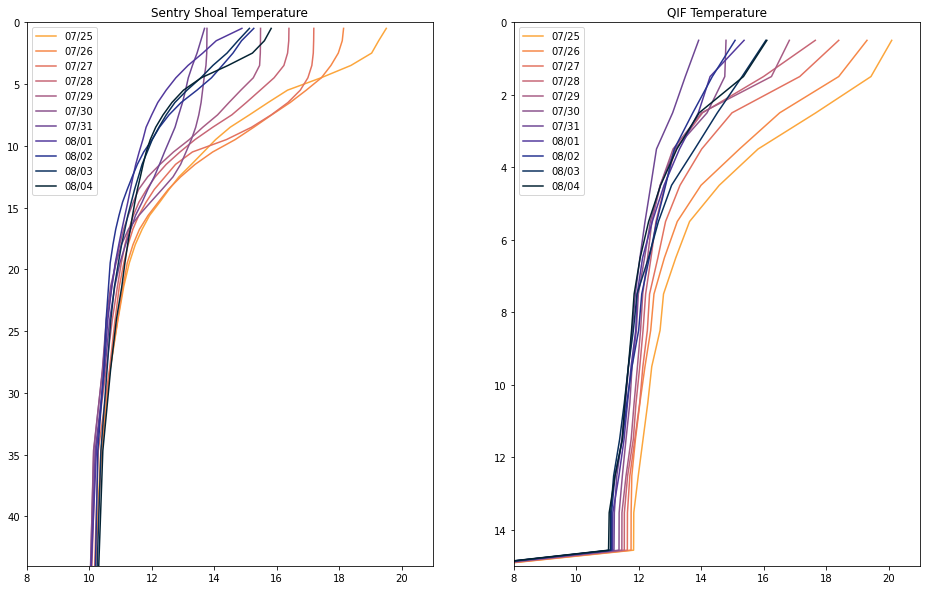

In [76]:
fig, ax = plt.subplots(1,2, figsize=(16,10))
colors = cm.thermal_r(np.linspace(0.2,1,11))

for i in range(len(physics.time)):
    time = pd.to_datetime(str(physics.time[i].values)).strftime("%m/%d")
    ax[0].plot(physics.votemper[i,:,isent,jsent], physics.depth, label = time, c=colors[i])
ax[0].set_ylim([0,44])
ax[0].set_xlim([8,21])
ax[0].invert_yaxis()
ax[0].legend()
ax[0].set_title('Sentry Shoal Temperature')


for i in range(len(physics.time)):
    time = pd.to_datetime(str(nitrate.time[i].values)).strftime("%m/%d")
    ax[1].plot(physics.votemper[i,:,iqifs,jqifs], physics.depth, label = time, c=colors[i])
ax[1].set_ylim([0,15])
ax[1].set_xlim([8,21])
ax[1].invert_yaxis()
ax[1].legend()
ax[1].set_title('QIF Temperature')

### Do they resemble the expected changes during wind-driven surface mixing?

### Is the quantity conserved over the the period, within model errors?

Text(0.5, 1.0, 'Salinity Change from time 0')

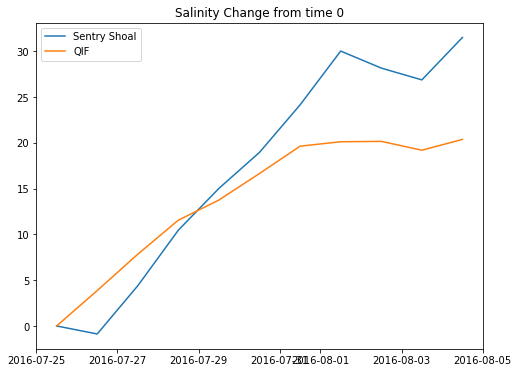

In [93]:
fig, ax = plt.subplots(1,1, figsize=(8,6))

ax.plot(physics.time, physics.vosaline[:,:,isent,jsent].sum(axis=1)-sum(physics.vosaline[0,:,isent,jsent]), label ='Sentry Shoal')
ax.plot(physics.time, physics.vosaline[:,:,iqifs,jqifs].sum(axis=1)-sum(physics.vosaline[0,:,iqifs,jqifs]), label ='QIF')
ax.legend()
ax.set_title('Salinity Change from time 0')

# Part C: Back tracking the peak values

Could it be due/partially due to the coastal upwelling suggested by Moore-Maley and Allen (2022) or the tidal mixing jet suggested by Olson et al (2020)? To do this, can we track the water observed at the peak of the event backward in time?

### Identify the salinity, temperature and nitrate values at the open station at the peak of the event. Put a range around those physical values (say 0.5 g/kg, 1oC). We need to also consider that nitrate can be taken up by biology so it could increase as we go back in time. Consider your value a minimum nitrate value.

### Map the location of that salinity, temperature and nitrate range at the peak of the event (peak of pCO2). I used masked arrays in python to do this selection. Identify the regions where all three ranges happen at once. (See figure below). This water mass is a three dimensional object. I also plot cross-sections. You can also look at various depths from the surface.

In [138]:
def dotheplots(bathymetry, day, kd, isent, jsent, iqifs, jqifs, tepmin, tepmax, salmin, salmax, nitmin):
    '''
    bathymetry: xarray of bathmetry file
    day: day of file (so Jul 25 is 0)
    kd: depth index (0 is surface)
    isent, jsent: indexes of Sentry Shoal
    ex, ey: indexes of another point
    tepmin, tepmax: temperature limits
    salmin, salmax: salinity limits
    nitmin: nitrate limit
    '''
    
    fig, axs = plt.subplots(2, 3, figsize=(18, 12))
    
    imin, imax = 650, 800
    jmin, jmax = 100, 215
    
    # bathymetry plots
    bathymetry.bathymetry.plot(ax=axs[0, 0], cmap=mycm);
    axs[0, 0].set_ylim(imin, imax)
    axs[0, 0].set_xlim(jmin, jmax)
    
    # temperature plot
    dm = physics
    # temperature, masked between the limits
    myarray = np.ma.array(dm.votemper[day, kd, imin:imax, jmin:jmax], 
                      mask= (dm.votemper[day, kd, imin:imax, jmin:jmax] > tepmax) | (dm.votemper[day, kd, imin:imax, jmin:jmax] < tepmin))
    colours = axs[0, 1].pcolormesh(np.arange(jmin, jmax), np.arange(imin, imax), myarray, cmap=cm.thermal, shading='auto')
    fig.colorbar(colours, ax=axs[0, 1])
    axs[0, 1].set_title(f'Temperature at {kd+0.5} m (conservative $^o$C)')
    
    # salinity plot
    # salinity, masked between the limits
    myarray = np.ma.array(dm.vosaline[day, kd, imin:imax, jmin:jmax], 
                      mask= (dm.vosaline[day, kd, imin:imax, jmin:jmax] > salmax) | (dm.vosaline[day, kd, imin:imax, jmin:jmax] < salmin))
    colours = axs[0, 2].pcolormesh(np.arange(jmin, jmax), np.arange(imin, imax), myarray, cmap=cm.haline, shading='auto')
    axs[0, 2].set_title(f'Salinity at {kd+0.5} m (g/kg)')
    fig.colorbar(colours, ax=axs[0, 2])
    
    # nitrate
    ds = nitrate
    myarray = np.ma.array(ds.nitrate[day, kd, imin:imax, jmin:jmax], 
                      mask= ds.nitrate[day, kd, imin:imax, jmin:jmax] < nitmin)
    colours = axs[1, 0].pcolormesh(np.arange(jmin, jmax), np.arange(imin, imax), myarray, cmap=cm.rain, shading='auto')
    fig.colorbar(colours, ax=axs[1, 0])
    axs[1, 0].set_title(f'Nitrate at {kd+0.5} m (uM)')
    
    # intersection of the temperature, salinity and nitrate on this surface
    myarray = np.ma.array(np.ones((imax-imin, jmax-jmin)), 
                      mask= (dm.votemper[day, kd, imin:imax, jmin:jmax] > tepmax) | (dm.votemper[day, kd, imin:imax, jmin:jmax] < tepmin)
                     | (dm.vosaline[day, kd, imin:imax, jmin:jmax] > salmax) | (dm.vosaline[day, kd, imin:imax, jmin:jmax] < salmin)
                          | (ds.nitrate[day, kd, imin:imax, jmin:jmax] < nitmin))
    myarray.mask = myarray.mask | np.isnan(bathymetry.bathymetry[imin-600:imax-600, jmin:jmax])
    colours = axs[1, 1].pcolormesh(np.arange(jmin, jmax), np.arange(imin, imax), myarray, cmap=cm.dense, shading='auto')
    fig.colorbar(colours, ax=axs[1, 1])
    axs[1, 1].set_title(f'Intersection of all three Ranges at {kd+0.5} m');
    
    # create the full 3-D object of this water mass down to 15 m and then plot it in various ways to look at it
    kdd = 15
    watermass = np.ma.array(np.ones((kdd, imax-imin, jmax-jmin)), 
                      mask= (dm.votemper[day, 0:kdd, imin:imax, jmin:jmax] > tepmax) | (dm.votemper[day, 0:kdd, imin:imax, jmin:jmax] < tepmin)
                     | (dm.vosaline[day, 0:kdd, imin:imax, jmin:jmax] > salmax) | (dm.vosaline[day, 0:kdd, imin:imax, jmin:jmax] < salmin)
                           | (ds.nitrate[day, 0:kdd, imin:imax, jmin:jmax] < nitmin)
                       )
    
    # number of depth points with this water mass
    vertsum = watermass.sum(axis=0)
    vertsum.mask = vertsum.mask |  np.isnan(bathymetry.bathymetry[imin-600:imax-600, jmin:jmax])
    colours = axs[1, 2].pcolormesh(np.arange(jmin, jmax), np.arange(imin, imax), vertsum, cmap='plasma', shading='auto')
    fig.colorbar(colours, ax=axs[1, 2])
    axs[1, 2].set_title('Thickness of intersection of all three Ranges (m)');

    # add our points to these plots
    for ax in axs[0]:
        ax.plot(jsent+0.5, isent+0.5, 'ro')
        ax.plot(jqifs+0.5, iqifs+0.5, 'mo')
        ax.set_aspect(500/440)
    for ax in axs[1]:
        ax.plot(jsent+0.5, isent+0.5, 'ro')
        ax.plot(jqifs+0.5, iqifs+0.5, 'mo')
        ax.set_aspect(500/440)

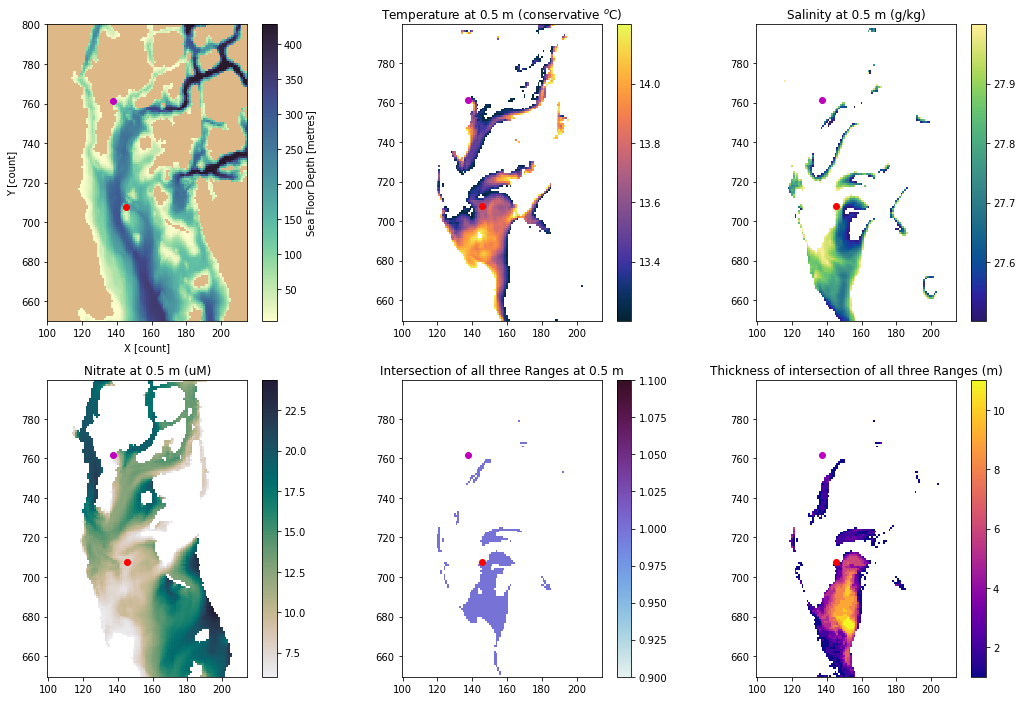

In [144]:
# dotheplots(bathymetry, day, kd, isent, jsent, iqifs, jqifs, tepmin, tepmax, salmin, salmax, nitmin)
dotheplots(bathymetry, 6, 0, isent, jsent, iqifs, jqifs, 13.2, 14.2, 27.5, 28, 6)

### Now go back to the day before. Where are the possible locations/depths of the your water? What is closest to the location the next day (aka the peak)? Note that this piece of the assignment is exploratory and a bit subjective. You would need to do much tightening to publish it! Don’t forget to look in three-dimensions.

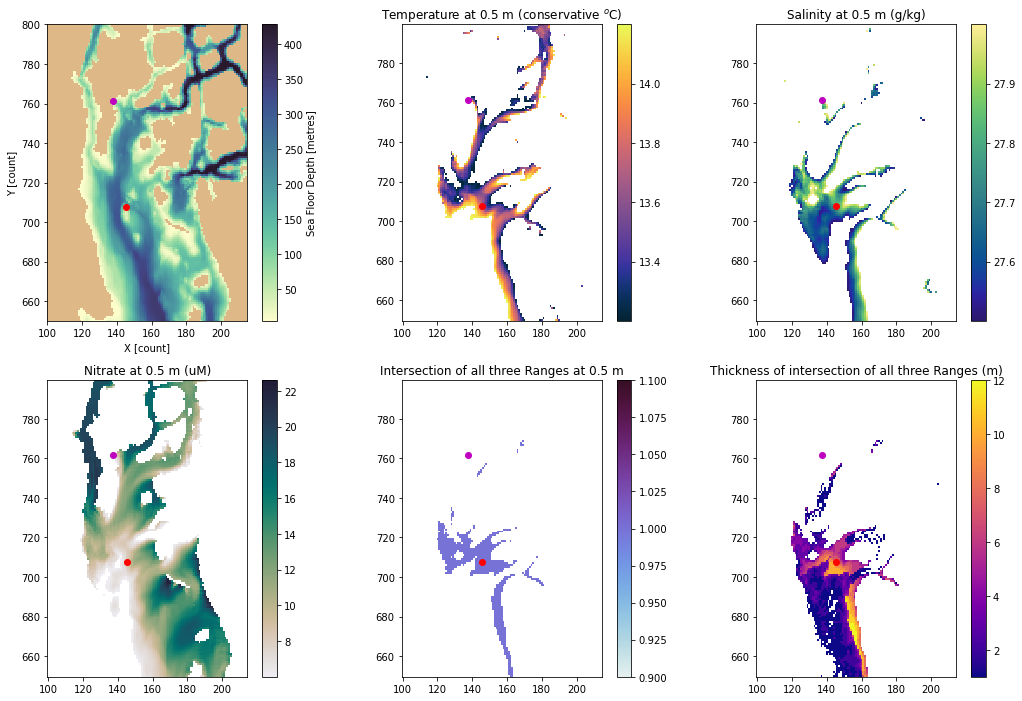

In [145]:
dotheplots(bathymetry, 5, 0, isent, jsent, iqifs, jqifs, 13.2, 14.2, 27.5, 28, 6)

###  Step back another day see if you can figure out where the water came from.

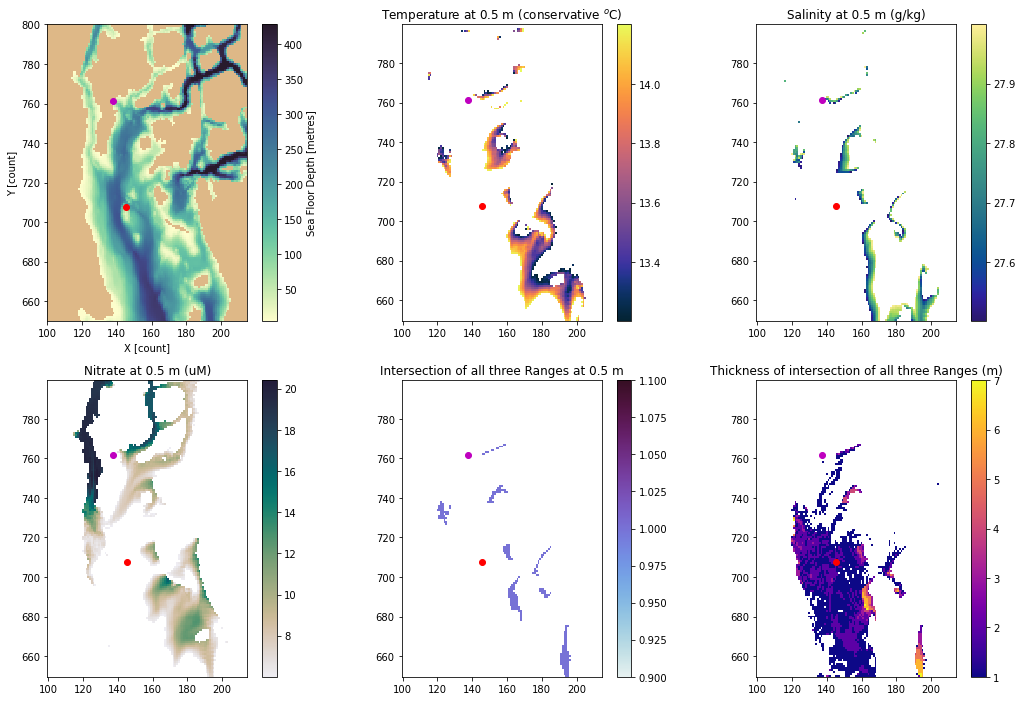

In [146]:
dotheplots(bathymetry, 4, 0, isent, jsent, iqifs, jqifs, 13.2, 14.2, 27.5, 28, 6)

### Given where the water appears to come from and its trajectory over time, do you see trace of coastal upwelling or the influence of the tidal mixing jet?